# Preprocessing and clustering tutorial on scanpy

First, install the relevant modules and set figure params. 

In [31]:
import scanpy as sc
import anndata as ad
import pooch

In [32]:
# Set global plotting parameters to make figures nicer
sc.set_figure_params(dpi=50, facecolor="white")

## Download data
Next download the relevant data using anndata package. The data used in this basic preprocessing and clustering tutorial was collected from bone marrow mononuclear cells of healthy human donors and was part of openproblem’s NeurIPS 2021 benchmarking dataset [Luecken et al., 2021]. The samples used in this tutorial were measured using the 10X Multiome Gene Expression and Chromatin Accessability kit.



In [33]:
# Create a pooch object that downloads, caches and retrieves data files. Scache the downloaded data data directory
exampledat = pooch.create(
    path=pooch.os_cache("/Users/sshen4/Documents/singlecell_QTL_analysis/testing_methods/data"), 
    base_url="doi:10.6084/m9.figshare.22716739.v1/"
    )
exampledat.load_registry_from_doi()

In [34]:
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {}

for sample_id, filename in samples.items():
    path = exampledat.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

/Users/sshen4/Library/Application Support/hatch/env/virtual/scanpy-tut/3qmyJ1HI/scanpy-tut/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/sshen4/Library/Application Support/hatch/env/virtual/scanpy-tut/3qmyJ1HI/scanpy-tut/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


sample
s1d1    8785
s1d3    8340
Name: count, dtype: int64


/Users/sshen4/Library/Application Support/hatch/env/virtual/scanpy-tut/3qmyJ1HI/scanpy-tut/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/sshen4/Library/Application Support/hatch/env/virtual/scanpy-tut/3qmyJ1HI/scanpy-tut/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/sshen4/Library/Application Support/hatch/env/virtual/scanpy-tut/3qmyJ1HI/scanpy-tut/lib/python3.13/site-packages/anndata/_core/anndata.py:1774: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'

So what is stored in an anndata object and how? 
adata.var_names - the gene names
adata.obs_names - the cell names
adata.obs - cell-level metadata
adata.var - gene-level metadata

In [53]:
print(adata.var_names[:5]) # contains the gene names
print(adata.obs_names[:5]) # contains the cell names

print("cell-level metadata")
print(adata.obs.head())
print("gene-level metadata")
print(adata.var.head())

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Index(['AAACCCAAGGATGGCT-1', 'AAACCCAAGGCCTAGA-1', 'AAACCCAAGTGAGTGC-1',
       'AAACCCACAAGAGGCT-1', 'AAACCCACATCGTGGC-1'],
      dtype='object')
cell-level metadata
                   sample  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGGATGGCT-1   s1d1               2103                 7.651596   
AAACCCAAGGCCTAGA-1   s1d1               3916                 8.273081   
AAACCCAAGTGAGTGC-1   s1d1                683                 6.527958   
AAACCCACAAGAGGCT-1   s1d1               4330                 8.373554   
AAACCCACATCGTGGC-1   s1d1                325                 5.786897   

                    total_counts  log1p_total_counts  \
AAACCCAAGGATGGCT-1        8663.0            9.066932   
AAACCCAAGGCCTAGA-1       12853.0            9.461411   
AAACCCAAGTGAGTGC-1        1631.0            7.397562   
AAACCCACAAGAGGCT-1       17345.0            9.761117   
AAACCCACATCGTGGC-1         

In [36]:
adata.var["mt"] = adata.var_names.str.startswith("MT-") # Mitochondrial genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL")) # Ribosomal genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]") # hemoglobin genes

In [37]:
# Investigate QC metrics

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [43]:
adata.obs_names

Index(['AAACCCAAGGATGGCT-1', 'AAACCCAAGGCCTAGA-1', 'AAACCCAAGTGAGTGC-1',
       'AAACCCACAAGAGGCT-1', 'AAACCCACATCGTGGC-1', 'AAACCCACATTCTCTA-1',
       'AAACCCAGTCCGCAGT-1', 'AAACCCAGTGCATACT-1', 'AAACCCAGTTGACGGA-1',
       'AAACCCATCGATACTG-1',
       ...
       'TTTGGTTCATGTTACG-1', 'TTTGGTTGTCTCACAA-1', 'TTTGGTTTCCCATTCG-1',
       'TTTGGTTTCCGTCCTA-1', 'TTTGGTTTCTTGCGCT-1', 'TTTGTTGAGAGTCTGG-1',
       'TTTGTTGCAGACAATA-1', 'TTTGTTGCATGTTACG-1', 'TTTGTTGGTAGTCACT-1',
       'TTTGTTGTCGCGCTGA-1'],
      dtype='object', length=17125)

Inspect the QC metrics:
- Number of genes expressed in the count matrix
- Total counts per cell
- Percentage of counts in mitochondrial genes

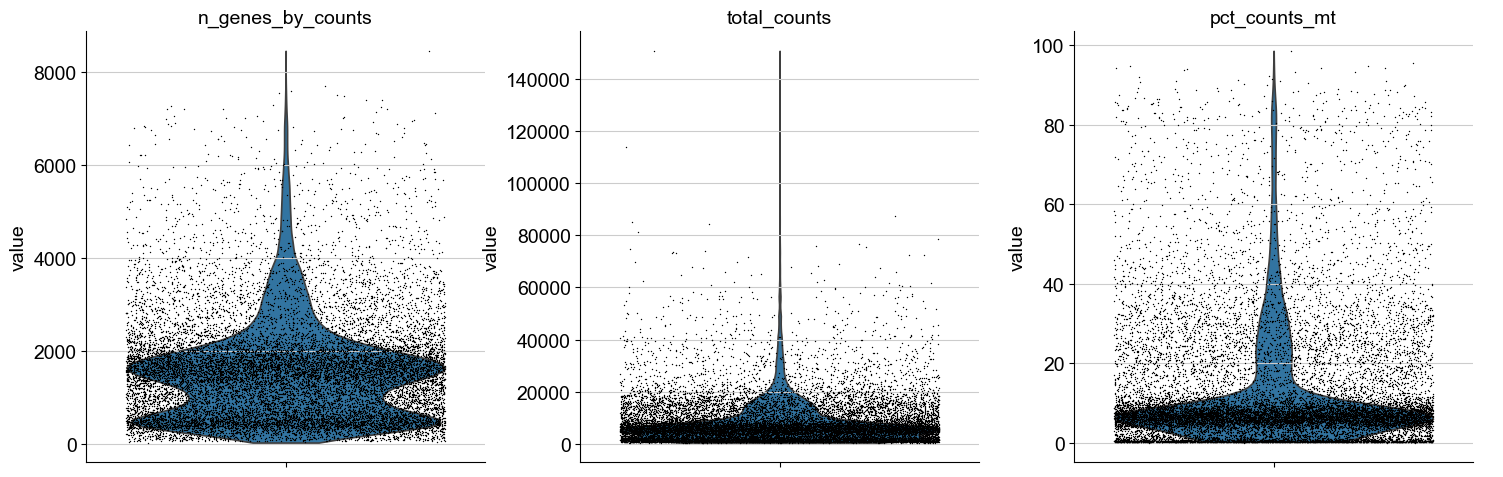

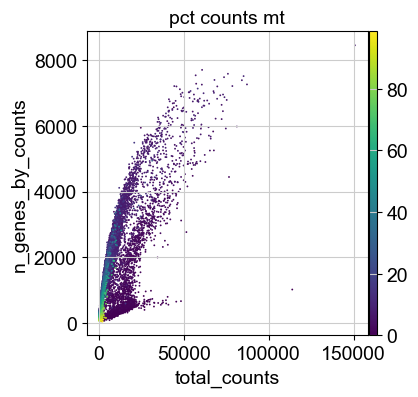

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.scatter(adata, "Total UMIs per cell", "Number of genes per cell", color="pct_counts_mt")

The scattergraph at the bottom is telling us how many UMIs were counted per cell (x-axis) and comparing this to the number of unique genes counter per cell. The colour corresponds to the percentage of the UMIs that can be attributed to mitochondrial genes. 

## Filtering

The recommendation is to conduct some cell-level and gene-level filtering. It's sometimes unclear whether the cell/gene-level observations are actual outliers due to bad quality, or whether there is interesting biology driving such results. The recommendation is to start with a permissive filtering strategy and revisit later. We filter cells with less than 100 genes expressed and genes that are detected in less than 3 cells (out of >17k cells). 

When there are multiple batches, QC should be performed for each sample individually as QC thresholds can vary substantially between batches. 

'sc.pp.filter_cells' and 'sc.pp.filter_genes' are used to filter cells and genes. 

In [ ]:
# Before filtering
initial_cells = adata.n_obs
initial_genes = adata.n_vars

# Filter cells
sc.pp.filter_cells(adata, min_genes=100)

# After filtering
filtered_cells = adata.n_obs
filtered_genes = adata.n_vars

# Number of cells removed
print(f"Cells removed: {initial_cells - filtered_cells}")
print(f"Genes removed: {initial_genes - filtered_genes}")

In [55]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'